In [5]:
# PDF2TEXT

import pandas as pd
import numpy as np
import string
import os, io

from pathlib import Path
import requests
    
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

def get_pdf_from_url(pdf_path, pdf_url):
    pdf = Path(pdf_path)
    response = requests.get(pdf_url)
    pdf.write_bytes(response.content)
    
def pdf_info(pdf_path):
    pdf = open(pdf_path, 'rb')
    parser = PDFParser(pdf)
    return PDFDocument(parser).info[0]

def pdf2txt(pdf_path):
    
    pdf = open(pdf_path, 'rb')

    # Init.
    resource_manager = PDFResourceManager()
    string_buffer = io.StringIO()  
    
    # Construct.
    converter = TextConverter(resource_manager, 
                              string_buffer, 
                              laparams=LAParams(), 
                              codec='utf-8')
    interpreter = PDFPageInterpreter(resource_manager, converter) 
    
    # Read pdf (list of pages).
    pdf_pages = PDFPage.get_pages(pdf, check_extractable=True) # list
    
    # Process pdf to text.
    [interpreter.process_page(page) for page in pdf_pages]
    
    # Result.
    pdf_text = string_buffer.getvalue()
    
    [o.close() for o in [pdf, string_buffer, converter]]
    return pdf_text

In [6]:
# TEXT CLEANER

from bs4 import BeautifulSoup
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Set stop words
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['RT', 'rt'])

# Initiate sub-parts
WNL = WordNetLemmatizer()

def remove_mentions(text):
    return ' '.join([w for w in text.split(' ') if not w.startswith('@')])
def remove_url(text):
    return re.sub('https?://[A-Za-z0-9./]+','',text)
def html_strip_lxml(text):
    return BeautifulSoup(text, 'lxml').get_text()
def remove_special_characters(text, peserve):
    return re.sub("[^a-zA-Z{}]".format(peserve), " ", text)
def lowercase_text(text):
    return text.lower()
def strip_inner_spaces(text):
    return ' '.join([w.strip() for w in text.split()])
def remove_stop_words(text):
    return ' '.join([w for w in text.split() if not w in set(stopwords)])
def lemmatize_words(text, WNL):
    return ' '.join([WNL.lemmatize(word, pos='v') for word in text.split()])

def cleaner(text):
    text = remove_mentions(text)
    text = remove_url(text)
    text = html_strip_lxml(text)
    text = remove_special_characters(text,peserve='')
    text = lowercase_text(text)
    text = strip_inner_spaces(text)
    text = remove_stop_words(text)
    #text = lemmatize_words(text, WNL)
 
    return text

# Usage single
#clean = cleaner('your text')

# Usage dataframe
#df['clean_COLUMN_NAME'] = df.COLUMN_NAME.apply(cleaner)

In [9]:
# URL PDF GET DATA

# Save path
DIR = os.getcwd()
pdf_path = os.path.join(DIR, 'test.pdf')

# Target: (example PDFs: https://arxiv.org/list/cs.CL/new )
pdf_url = ''
pdf_url = ''
pdf_url = ''
pdf_url = 'https://assets.cureus.com/uploads/technical_report/pdf/17211/1553801088-20190328-62-44vky7.pdf'

pdf_url = 'https://arxiv.org/pdf/1904.00157.pdf'
pdf_url = 'https://arxiv.org/pdf/1806.09525.pdf'
pdf_url = 'https://arxiv.org/pdf/1904.00110.pdf'

# GET PDF FROM URL
get_pdf_from_url(pdf_path, pdf_url)

# GET PDF DATA
pdf_data = pdf_info(pdf_path)    
pdf_text = pdf2txt(pdf_path)

# Precleaned text [just to see]
clean_text = cleaner(pdf_text)
clean_text[:1000] + ' (...)'

'keyphrase generation text summarization struggle erion c ano institute formal applied linguistics charles university prague czech republic ond rej bojar institute formal applied linguistics charles university prague czech republic cano ufal mff cuni cz bojar ufal mff cuni cz r l c c v v x r abstract authors keyphrases assigned scienti c ar ticles essential recognizing content topic aspects proposed supervised unsupervised methods keyphrase gen eration unable produce terms valuable appear text paper explore possibility consider ing keyphrase string abstractive sum mary title abstract first collect process release large dataset scienti c paper metadata contains mil lion records experiment pop ular text summarization neural architectures despite using advanced deep learning models large quantities data many days com putation systematic evaluation four test datasets reveals explored text sum marization methods could produce bet ter keyphrases simpler unsupervised methods existing supervis

In [10]:
# EXPLORATION: SHOW 

# Set pandas display for text exploration
def pandas_display(rows, cols, width):
    pd.set_option('display.max_rows', rows)
    pd.set_option('display.max_columns', cols)
    pd.set_option('display.width', width)
#pandas_display(500,500,1000)



# General text info

# Text
text = clean_text

# Made of
all_chars = text
uni_chars = set(text)

all_words = text.split()
uni_words = set(text.split())

all_sents = text.split('.')
uni_sents = set(text.split('.'))


# Keywords pick:

# A - User defined word pick
my_words = ['ai','psychology']

# B - Paper - related words (predefined)
paper_words = ['title', 'subject',
            'author',
            'keyword', 'keywords', 'category', 'categories',
            'abstract', 
            'introduction', 
            'intro', 
            'method', 'methods',
            'result', 'results',
            'discussion',
            'conclusions', 'conclusion',
            'acknowledgement', 'acknowledgements',
            'references', 'citation', 'citations',
            ''
           ]

# Display text info
print('1. Text Info:\n-------------\n                    all        uniq\n')
print('Characters:{:12}{:12}'.format(len(all_chars),len(uni_chars)))
print('Words:     {:12}{:12}'.format(len(all_words),len(uni_words)))
print('Sentences: {:12}{:12}'.format(len(all_sents),len(uni_sents)))
print('\n\n\n')

# PDF text.
show = 100 # SHOW FIRST X CHARACTERS OF PDF
print("2. Fragment:\n------------\n\n", pdf_text[:show],'(...)\n\n\n')

# PDF text cleaned (JUST LOOKING, DONT PREPROCESS YET).
clean_text = cleaner(pdf_text) 
print('3. Clean fragment:\n------------------\n\n',clean_text[:show], ' (...)\n\n\n')

# PDF data.
print("4. PDF data:\n------------\n\n")
for k in pdf_data.keys():
    v = pdf_data[k] #.decode('utf-8')
    print('{:15} {}'.format(k, v))
print(' (...)\n\n\n')

# PDF sentences by keywords.
print("5. PDF keywords sentences:\n--------------------------\na) paper related (predefined)\nb) keywords (user defined)\n\n")
for i, sent in enumerate(all_sents):
    for word in sent.split():
        if word in paper_words:
            print('Sentence: {:<4}| Words: {}'.format(i, word))
            print('>', sent)
            print()
    if i > 10:
        print ('\n\n>>> Breaking after',i, 'loops, setup at line 80')
        break

1. Text Info:
-------------
                    all        uniq

Characters:       19740          27
Words:             2718        1177
Sentences:            1           1




2. Fragment:
------------

 Keyphrase Generation: A Text Summarization Struggle

Erion C¸ ano

Institute of Formal and Applied
L (...)



3. Clean fragment:
------------------

 keyphrase generation text summarization struggle erion c ano institute formal applied linguistics ch  (...)



4. PDF data:
------------


Producer        b'dvips + GPL Ghostscript GIT PRERELEASE 9.22'
CreationDate    b"D:20190402113422-04'00'"
ModDate         b"D:20190402113422-04'00'"
Creator         b'LaTeX with hyperref package'
Title           b''
Subject         b''
Author          b''
Keywords        b''
 (...)



5. PDF keywords sentences:
--------------------------
a) paper related (predefined)
b) keywords (user defined)


Sentence: 0   | Words: abstract
> keyphrase generation text summarization struggle erion c ano institute fo

All:        513
>0:         513
>1:         511
>8:         328
Tresholds


,Sentences left
Min chars,
0,513
10,319
20,279
30,256
40,243
50,213
60,196
70,173
80,152


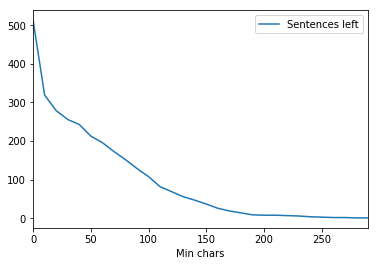

In [366]:
# EXPLORATION 2: sentences below length of N

# Decision: minimum sentence length?

import matplotlib as plt 


def valid_sentences(all_sents, N):
    return [sent for sent in all_sents if len(sent)>N]

def not_valid_sentences(all_sents, N):
    return [sent for sent in all_sents if len(sent)<N]

def show_tresholds(all_sents, Ns):
    lst =[]
    for N in Ns:
        v_sents = valid_sentences(all_sents, N)
        lst.append([N, len(v_sents)])
    df = pd.DataFrame(lst, columns=['Min chars','Sentences left'])
    df.index = df['Min chars']
    del df['Min chars']
    display(df)
    display(df.plot())

def show_sentences(all_sents, N, valid,show):
    if valid:
        v_sents = valid_sentences(all_sents, N)
    else:
        v_sents = not_valid_sentences(all_sents, N)
    df = pd.DataFrame(v_sents)
    display(df.head(show))
    
    
    
# Decision: minimum sentence length?

above_N = 8 # initial pick after exploration
Ns = range(0,300,10) # more picks
show_examples = 20

# Delete empty
sents_above0 = [sent for sent in all_sents if len(sent)>0]

# Delete one character sentences
sents_above1 = [sent for sent in all_sents if len(sent)>1]

# Delete characters below N chars
sents_aboveN = [sent for sent in all_sents if len(sent)>above_N]


print('All: {:10}'.format(len(all_sents)))
print('>0:  {:10}'.format(len(sents_above0)))
print('>1:  {:10}'.format(len(sents_above1)))
print('>{}:  {:10}'.format(above_N,len(sents_aboveN)))

print('Tresholds')
show_tresholds(all_sents, Ns)

In [367]:
print('Examples of not valid sentences for given treshold')
show_sentences(all_sents, N=20, valid=False, show=show_examples)

Examples of not valid sentences for given treshold


,0
0,mff
1,cuni
2,cz\n\nbojar@ufal
3,mff
4,cuni
5,2 mil-\nlion records
6,\nMeng et al
7,", 2018;\nRush et al"
8,", 2015; See et al"
9,", 2017; Rush et al"


In [368]:
# EXPLORE: Word frequencies:


for word in my_words:
    print(word, all_words.count(word))

ai 0
psychology 0


In [369]:
for word in paper_words:
    print(word, all_words.count(word))

title 6
subject 0
author 1
keyword 14
keywords 14
category 0
categories 0
abstract 3
introduction 0
intro 0
method 2
methods 15
result 3
results 3
discussion 0
conclusions 0
conclusion 0
acknowledgement 0
acknowledgements 0
references 0
citation 0
citations 0
 0


In [370]:
from collections import Counter
Counter(all_words).most_common(50)

[('the', 166),
 ('of', 141),
 ('and', 141),
 ('for', 59),
 ('in', 49),
 ('to', 48),
 ('a', 47),
 ('is', 46),
 ('are', 39),
 ('that', 35),
 ('on', 35),
 ('In', 33),
 ('et', 30),
 ('keyphrase', 29),
 ('with', 28),
 ('text', 24),
 ('from', 23),
 ('we', 22),
 ('The', 22),
 ('pages', 20),
 ('al.,', 19),
 ('not', 18),
 ('or', 17),
 ('Association', 17),
 ('as', 16),
 ('be', 16),
 ('methods', 15),
 ('Computational', 15),
 ('keyphrases', 14),
 ('keyword', 14),
 ('keywords', 14),
 ('each', 14),
 ('scores', 14),
 ('used', 14),
 ('Proceedings', 14),
 ('an', 13),
 ('summarization', 13),
 ('article', 13),
 ('supervised', 12),
 ('A', 11),
 ('unsupervised', 11),
 ('by', 11),
 ('al.', 11),
 ('This', 11),
 ('were', 11),
 ('abstractive', 10),
 ('datasets', 10),
 ('could', 10),
 ('models', 10),
 ('dataset', 9)]

In [371]:
# EXPLORE: Word parts

import spacy
from itertools import chain
nlp = spacy.load('en_core_web_sm')


all_nouns = []
all_adjs = []
for sent in all_sents:

    sent_nouns = [w.text for w in nlp(sent) if w.tag_ in ['NN']]
    all_nouns.extend(sent_nouns)

    sent_adjs = [w.text for w in nlp(sent) if w.tag_ in ['JJ']]
    all_adjs.extend(sent_adjs)    
    
Counter(all_nouns).most_common(30)
Counter(all_adjs).most_common(30)

[('unsupervised', 12),
 ('supervised', 11),
 ('abstractive', 10),
 ('abstract', 9),
 ('scientiﬁc', 8),
 ('full', 8),
 ('neural', 7),
 ('various', 6),
 ('ﬁrst', 6),
 ('large', 5),
 ('authors’', 5),
 ('other', 5),
 ('recent', 5),
 ('automatic', 5),
 ('deep', 4),
 ('many', 4),
 ('short', 4),
 ('few', 4),
 ('different', 4),
 ('several', 3),
 ('top', 3),
 ('entire', 3),
 ('popular', 3),
 ('topical', 3),
 ('similar', 3),
 ('academic', 3),
 ('extractive', 3),
 ('keyphrase', 3),
 ('next', 3),
 ('Full', 3)]

In [397]:
###
###
### Plan
###
### 

# 1. Get sentences as datafeame
# 2. Nan: droping nonvalid sentences
# 3. Feature: cleaned: specific and general
# 4. Feature: preprocessed: ?
# 5. Feature: WP (word pick - no stop words, ?)
# 6. Separate script: word weights
# 7. Feature: word weights for word pick
# 8. Feature WORD WEIGHTS SUM FOR SENT
# 9. ##Feature: TAGS ?
# 10. ##Feature: Ents ?
# 11. ##Feature: (Heads, sent) ?
# 12. ##Feature: dates ?
# 13. ##Script : my words weights
# 13. ##Feature: MY WORD WEIGHTS SUM FOR SENT
# 13. SETTER: MY_WORDS + MAX_SENT_TO_SHOW
# 14. RUN: Show me N most important sentences from X.
# 15. #Script: Heads, sent, related words, summary for N sent.
# 16. Display 
# 17. Flask
# 18. Look
# 19. Test
# 20. Docker / server / zip / git / else

In [398]:
from nltk.tokenize import sent_tokenize


# Text (original)
text_raw = pdf_text #cleaner(pdf_text)
text_raw[:1000]


# Preprocessing

print('\n\n1. Sentences as dataframe:')
sentences = sent_tokenize(text_raw)# Be careful with '.', '!', '?', etc. 
df =pd.DataFrame({'sentences':sentences})

# Bugfix: pandas & spacy integration  (link: https://github.com/jupyter/notebook/issues/4369)
assert len(sentences) == len(df), 'len(sentences) != len(df)'
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

display(df.head(3))
print(df.shape)



print('\n\n2. Feature: cleaned: specific and general:')
df['clean_sent'] = df['sentences']
df['clean_auto'] = df['sentences'].apply(custom_cleaner)

display(df.head(3))
print(df.shape)



print('\n\n3. Droping too-short sentences:') 
df = df[(df.clean_auto.str.len() > 8)].reset_index(drop=True)
del df['clean_auto']

display(df.head(3))
print(df.shape)



1. Sentences as dataframe:


,sentences
0,Keyphrase Generation: A Text Summarization Str...
1,s\nc\n[\n \n \n\n1\nv\n0\n1\n1\n0\n0\n\n.
2,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...


(301, 1)


2. Feature: cleaned: specific and general:


,sentences,clean_sent,clean_auto
0,Keyphrase Generation: A Text Summarization Str...,Keyphrase Generation: A Text Summarization Str...,keyphrase generation text summarization strugg...
1,s\nc\n[\n \n \n\n1\nv\n0\n1\n1\n0\n0\n\n.,s\nc\n[\n \n \n\n1\nv\n0\n1\n1\n0\n0\n\n.,c v .
2,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...,v x r abstract authors keyphrases assigned sci...


(301, 3)


3. Droping too-short sentences:


,sentences,clean_sent
0,Keyphrase Generation: A Text Summarization Str...,Keyphrase Generation: A Text Summarization Str...
1,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...
2,Most of the proposed supervised\nand unsupervi...,Most of the proposed supervised\nand unsupervi...


(272, 2)


In [439]:
# TEXT CLEANER

from bs4 import BeautifulSoup
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def remove_url(text):
    return re.sub('https?://[A-Za-z0-9./]+','',text)
def html_strip_lxml(text):
    return BeautifulSoup(text, 'lxml').get_text()
def remove_special_characters(text, preserve):
    return re.sub("[^a-zA-Z{}]".format(preserve), " ", text)
def lowercase_text(text):
    return text.lower()
def strip_inner_spaces(text):
    return ' '.join([w.strip() for w in text.split()])
def remove_stop_words(text):
    return ' '.join([w for w in text.split() if not w in set(stopwords)])
def lemmatize_words(text, WNL):
    return ' '.join([WNL.lemmatize(word, pos='v') for word in text.split()])


print('4. Custom cleaning')

WNL = WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['RT', 'rt'])

def custom_cleaner(text):
    text = remove_url(text) # Dont use for link catch-up
    text = html_strip_lxml(text) # Dont use to split layout paragraphs
    text = remove_special_characters(text, preserve='') #='.?!') #234567890') # Dont use for dates
    text = lowercase_text(text) # Dont for entities
    text = strip_inner_spaces(text)
    text = remove_stop_words(text)
    #text = lemmatize_words(text, WNL)
    return text

df['clean_sent'] = df.sentences.apply(custom_cleaner)
# df['links'] = '' 
# df['section'] = ''
# df['dates'] = ''
# df['entities'] = ''
# df['x'] = ''

# Show
display(df.head(3))
print(df.shape)
print()
for i in range(5,7):
    print('>', df.sentences[i])
    print('>', df.clean_sent[i])
    print()

4. Custom cleaning


,sentences,clean_sent,word_pick,carry,institute,learning,yew,son,thang,wingnus,...,separately,publishing,usa,discrepancies,etc,output,technology,rewarding,ment,extractor
0,Keyphrase Generation: A Text Summarization Str...,keyphrase generation text summarization strugg...,keyphrase generation text summarization strugg...,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...,v x r abstract authors keyphrases assigned sci...,v x r abstract authors keyphrases assigned sci...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Most of the proposed supervised\nand unsupervi...,proposed supervised unsupervised methods keyph...,proposed supervised unsupervised methods keyph...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(272, 1361)

> Then we experiment with pop-
ular text summarization neural architectures.
> experiment pop ular text summarization neural architectures

> Despite using advanced deep learning models,
large quantities of data and many days of com-
putation, our systematic evaluation on four test
datasets reveals that the explored text sum-
marization methods could not produce bet-
ter keyphrases than the simpler unsupervised
methods, or the existing supervised ones.
> despite using advanced deep learning models large quantities data many days com putation systematic evaluation four test datasets reveals explored text sum marization methods could produce bet ter keyphrases simpler unsupervised methods existing supervised ones



In [440]:
from collections import Counter

# 5. Feature: WP (word pick - no stop words, ?)
df['word_pick'] = df.clean_sent.apply(lambda text: ' '.join([w for w in text.split()]))




# Option: lemmanize words before BOW - separate preprocessing

# Bag of words

clean_words = []
[clean_words.extend(s.split()) for s in df.clean_sent.to_list()]
print(len(clean_words))

# Weight metric: median of 5 most common words occurences
most_occuring_5_words = Counter([w for w in clean_words if len(w)>2]).most_common(5)
print(most_occuring_word)

occurence_weight = np.median([w[1] for w in most_occuring_5_words])
print(occurence_weight)



# Option: limit on frequencies
# Max occurences = X, min occurences = Y
# clean_words = clean_words


clean_words = set(clean_words)
print(len(clean_words))

# Create features for word counts and its weight
word_weights= {}
for w in clean_words:
    df[w] = 0
    word_weights[w] = 0
    
for i, sent in enumerate(df.clean_sent):
    for word in sent.split():
        if word in clean_words:
            df.loc[i, word] +=1
display(df.head(3))

for i, w in enumerate(clean_words):
    word_weights[w] = int(sum(df[w])) / int(occurence_weight)

def get_sent_weight_BOW(sent):
    sentence_rank = 0
    for w in sent.split():
        sentence_rank += word_weights[w]
    return sentence_rank
        
df['sent_weight_BOW'] = df.clean_sent.apply(get_sent_weight_BOW)

display(df.loc[:,['sentences', 'clean_sent','sent_weight_BOW']].head(10))
print(df.shape)

2721
[('keyphrase', 33), ('al.', 30), ('text', 28), ('pages', 20), ('methods', 19)]
20.0
1181


,sentences,clean_sent,word_pick,carry,institute,learning,yew,son,thang,wingnus,...,https,http,github,gov,net,liaad,nist,hdl,handle,keywordextractor
0,Keyphrase Generation: A Text Summarization Str...,keyphrase generation text summarization strugg...,keyphrase generation text summarization strugg...,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...,v x r abstract authors keyphrases assigned sci...,v x r abstract authors keyphrases assigned sci...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Most of the proposed supervised\nand unsupervi...,proposed supervised unsupervised methods keyph...,proposed supervised unsupervised methods keyph...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,sentences,clean_sent,sent_weight_BOW
0,Keyphrase Generation: A Text Summarization Str...,keyphrase generation text summarization strugg...,11.80
1,4\n0\n9\n1\n:\nv\ni\nX\nr\na\n\nAbstract\n\nAu...,v x r abstract authors keyphrases assigned sci...,4.85
2,Most of the proposed supervised\nand unsupervi...,proposed supervised unsupervised methods keyph...,6.85
3,"In this\npaper, we explore the possibility of ...",paper explore possibility consider ing keyphra...,5.45
4,"First, we\ncollect, process and release a larg...",first collect process release large dataset sc...,3.70
5,Then we experiment with pop-\nular text summar...,experiment pop ular text summarization neural ...,3.10
6,"Despite using advanced deep learning models,\n...",despite using advanced deep learning models la...,12.65
7,1 Introduction\n\nA valuable concept for searc...,introduction valuable concept searching catego...,8.20
8,Scientiﬁc articles are com-\nmonly annotated w...,scienti c articles com monly annotated keyphra...,4.05
9,Finding keyphrases that best describe the cont...,finding keyphrases best describe contents docu...,2.10


(272, 1371)


In [445]:
idx = df.clean_sent[(df.sent_weight_BOW > 20)].index
df_bow_rank = df.loc[idx,:]

#display(df_bow_rank)

sents = df_bow_rank.sentences.to_list()
sents = [custom_cleaner(s) for s in sents]
sents
#sents = cleaner(df.loc[idx,:'sentences'].to_list())
#print(sents)

['motivated recent advances neural chine translation abstractive text summa rization vaswani et al foster et al rush et al see et al pa per explore possibility considering keyphrase generation abstractive text sum marization task',
 'topicrank maui copyrnn merge inject abs pointcov hulth f f krapivin f f meng k f f oagk k f f table full match scores predicted keyphrases various methods hulth krapivin meng k oagk k method yake']

In [ ]:
# Explore: number of words left after applying minimum word count treshold
# For 5-15 page documents i concider 2-7 word treshold 
# Extra protection for predefined words no matter the treshold.

def get_cols_below_treshold(df, clean_words, treshold):
    ok, bad = 0, 0
    cols_to_drop = []
    for w in clean_words:
        if sum(df[w]) >= treshold:
            ok +=1
        else:
            bad +=1
            cols_to_drop.append(w)    
    ncols = bad
    nallcols = ok+bad
    perc = round(ncols/nallcols,0)*100
    print('Treshold {:1}: Would drop {:4} out of {:4} BOW columns ({}%)'.format(treshold,ncols, nallcols, perc))
    
    return cols_to_drop

def drop_cols_below_treshold(df, clean_words, treshold):
    
    cols_to_drop = get_cols_below_treshold(df, clean_words, treshold=treshold)
    
    ncols = len(cols_to_drop)
    nallcols = len(clean_words)
    perc = round(ncols/nallcols,2)*100
    print('Dropping {} out of {} BOW columns ({}%)'.format(ncols, nallcols, perc))
    print('Pre-drop shape:', df.shape)
    
    for col in cols_to_drop:
        if col in my_words and col in paper_words:
            continue
        else:
            del df[col]
    
    print('After-drop shape:', df.shape)
    return df

# Explore
for i in range(2,7):
    cols_to_drop = get_cols_below_treshold(df, clean_words, treshold=i)

# Pick
treshold = 3
print('\nPick:', treshold)
df = drop_cols_below_treshold(df, clean_words, treshold)


In [ ]:
# 6. Separate script: word weights

In [442]:

# 7. Feature: word weights for word pick

In [ ]:

# 8. Feature WORD WEIGHTS SUM FOR SENT

In [ ]:

# 9. ##Feature: TAGS ?
# 10. ##Feature: Ents ?
# 11. ##Feature: (Heads, sent) ?
# 12. ##Feature: dates ?

# 13. ##Script : my words weights
# 13. ##Feature: MY WORD WEIGHTS SUM FOR SENT

# 13. SETTER: MY_WORDS + MAX_SENT_TO_SHOW

# 14. RUN: Show me N most important sentences from X.

# 15. #Script: Heads, sent, related words, summary for N sent.

# 16. Display 
# 17. Flask
# 18. Look
# 19. Test
# 20. Docker / server / zip / git / else